In [ ]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
from wordcloud import WordCloud

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import coo_matrix

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import neighbors
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from sklearn.metrics import mean_squared_error as s_mean_squared_error
from sklearn.metrics import mean_absolute_error as s_mean_absolute_error
from sklearn.metrics import r2_score as s_r2_score

In [ ]:
df = pd.read_csv("data_final_ad.csv")

In [ ]:
from sklearn import datasets

x = df["gas"]
y = df["power"]

x.shape
y.shape
print(type(x))
print(type(y))
plt.figure()
plt.scatter(x, y, color='steelblue')
plt.show()

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
class MY_SimpleLinearRegression_2:
    
    def __init__(self):
        self.a_ = None
        self.b_ = None
        
    def fit(self, x_train, y_train):
        assert x_train.ndim == 1, 'Simple linear regression fits only one feature'
        assert x_train.shape[0] == y_train.shape[0], 'x and y must be the same length'
        
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)
        
        self.a_ = (x_train - x_mean).dot(y_train - y_mean) / (x_train - x_mean).dot(x_train - x_mean)
        self.b_ = y_mean - self.a_ * x_mean
        
        return self
    
    def _predict(self, x_single):
        return self.a_ * x_single + self.b_
    
    def predict(self, x_predict):
        assert x_predict.ndim == 1, 
        # assert self.a_ isnotNone
        #  and self.b_ isnotNone, 
        
        return np.array([self._predict(x) for x in x_predict])
    
    def __repr__(self):
        return'MY_SimpleLinearRegression_2()'

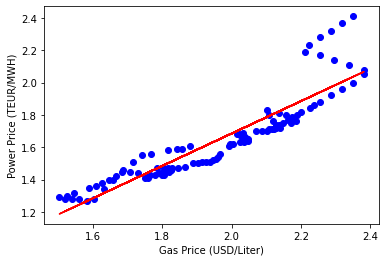

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 666)

x_train.shape
x_test.shape
y_train.shape
y_test.shape
my_SLR_2 = MY_SimpleLinearRegression_2()
my_SLR_2.fit(x_train, y_train)

my_SLR_2.a_
my_SLR_2.b_

y_train_predict = my_SLR_2.predict(x_train)

plt.figure()
plt.plot(x_train, y_train_predict, color='r',)
plt.scatter(x_train, y_train, color='b',)
plt.xlabel("Gas Price (USD/Liter)")
plt.ylabel("Coal Price (TEUR/MWH)")

plt.show()

In [ ]:
# analysis metrics

# mse
y_test_predict = my_SLR_2.predict(x_test)
mse_test = np.sum((y_test - y_test_predict) ** 2) / len(y_test)
mse_test 

0.004169589754905346

In [ ]:
# rmse
rmse_test = np.sqrt(np.sum((y_test - y_test_predict) ** 2) / len(y_test))
rmse_test

0.0645723606112193

In [ ]:
# mae
mae_test = np.sum(np.abs(y_test - y_test_predict)) / len(y_test)
mae_test 

0.05499600263327323

In [ ]:
R2_1 = 1 - np.sum((y_test - y_test_predict) ** 2) / (y_test - np.mean(y_test)).dot(y_test - np.mean(y_test))
R2_1 

# R2_2 = 1 - (np.sum((y_test - y_test_predict) ** 2)/len(y_test)) / np.var(y_test)
# R2_2 

0.7659950320775084

In [ ]:
# mae
s_mean_absolute_error(y_test, y_test_predict)  


13.234109333244119

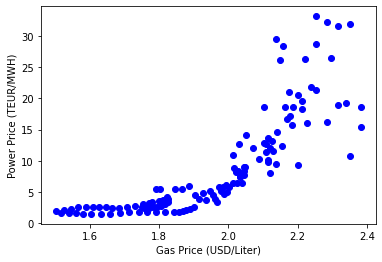

In [ ]:
# 

examDf = df
# extrate features and labels
# features
exam_X=examDf.loc[:,'gas']
# labes
exam_y=examDf.loc[:,'power']

# plot scatter plot
import matplotlib.pyplot as plt
plt.scatter(exam_X,exam_y,color='b',label='exam data')
plt.xlabel("Gas Price (USD/Liter)")
plt.ylabel("Power Price (TEUR/MWH)")
plt.show()

In [ ]:
from sklearn.model_selection  import train_test_split
# split train test set
X_train,X_test,y_train,y_test=train_test_split(exam_X,exam_y, train_size=0.75)

# print('original：',exam_X.shape,
#      ' train data',X_train.shape,
#     ' test data',X_test.shape)
# print('original：',exam_y.shape,
#      ' train data',y_train.shape,
#      ' test data',y_test.shape)

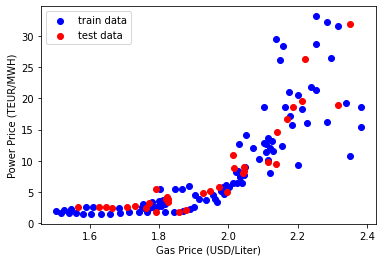

In [ ]:
# plot
import matplotlib.pyplot as plt

# red: test data / blue: train data
plt.scatter(X_train,y_train,color='blue',label='train data')
plt.scatter(X_test,y_test,color='red',label='test data')
plt.legend(loc=2)
plt.xlabel("Gas Price (USD/Liter)")
plt.ylabel("Power Price (TEUR/MWH)")
plt.show()

In [ ]:
# find linear equation

# Convert training data features into a 2D array
X_train=X_train.values.reshape(-1,1)
# Convert test data features into a 2D array
X_test=X_test.values.reshape(-1,1)

# Step 1: Import Linear Regression
from sklearn.linear_model import LinearRegression
# Step 2: Create the Model: Linear Regression
model=LinearRegression()
# Step 3: Train the model
model.fit(X_train,y_train)
a=model.intercept_
b=model.coef_


In [ ]:
# Correlation coefficient: The result returned by corr is a data frame, which stores the correlation coefficient matrix
# rDf=examDf[["wind", "power"]].corr()
rDf=examDf.corr()
print('Correlation coefficient matrix：')
print(rDf)

model.score(X_test,y_test)

Correlation coefficient matrix：
             Unnamed: 0      wind      coal      fuel  temperature     power  \
Unnamed: 0     1.000000 -0.628386  0.950902  0.844207    -0.091545  0.858642   
wind          -0.628386  1.000000 -0.621048 -0.524021    -0.017028 -0.596917   
coal           0.950902 -0.621048  1.000000  0.819688    -0.036918  0.832695   
fuel           0.844207 -0.524021  0.819688  1.000000    -0.177273  0.878708   
temperature   -0.091545 -0.017028 -0.036918 -0.177273     1.000000 -0.094104   
power          0.858642 -0.596917  0.832695  0.878708    -0.094104  1.000000   
coal.1         0.950902 -0.621048  1.000000  0.819688    -0.036918  0.832695   
wind.1        -0.628386  1.000000 -0.621048 -0.524021    -0.017028 -0.596917   
gas            0.921100 -0.502438  0.909304  0.905633    -0.203522  0.818394   

               coal.1    wind.1       gas  
Unnamed: 0   0.950902 -0.628386  0.921100  
wind        -0.621048  1.000000 -0.502438  
coal         1.000000 -0.621048  0.

0.6806039356287041